# GOLD on MCX

MCX, the Multi-Commodity eXchange of India, has a number of gold futures contracts listed. This is how you explore them on pluto.

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)
library(ggpubr)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
commoditiesFnO <- CommodityFuturesAndOptions()

In [2]:
#list all gold contracts on the MCX

goldMcx <- commoditiesFnO$McxEod() %>%
    filter(CONTRACT %like% '%gold%' & (OTYPE == 'XX' | OTYPE == 'FUTCOM')) %>%
    group_by(CONTRACT) %>%
    summarize(ST = min(TIME_STAMP, na.rm=T), ET = max(TIME_STAMP, na.rm=T)) %>%
    arrange(ST) %>%
    collect()

goldMcx %>%
    print(n=Inf)

# A tibble: 23 x 3
   CONTRACT   ST         ET        
 * <chr>      <chr>      <chr>     
 1 GOLD       2003-11-10 2019-09-12
 2 GOLDM      2003-11-20 2019-09-12
 3 GOLDHNI    2004-09-27 2010-06-25
 4 GOLDAHM    2005-07-15 2005-12-27
 5 GOLDKOL    2005-07-27 2005-12-27
 6 GOLDDEL    2005-07-27 2005-12-27
 7 GOLDMAHM   2005-09-19 2005-12-27
 8 GOLDMUM    2005-10-19 2005-12-27
 9 GOLDMKOL   2005-11-24 2005-12-27
10 GOLDMDEL   2005-11-24 2005-12-27
11 GOLDMMUM   2005-11-24 2005-12-27
12 IGOLDAHM   2005-12-27 2008-12-30
13 IGOLDDEL   2005-12-27 2008-12-30
14 IGOLDKOL   2005-12-28 2008-12-30
15 IGOLDMUM   2005-12-28 2008-12-30
16 IGOLDMKOL  2005-12-29 2008-12-30
17 IGOLDMDEL  2005-12-31 2008-12-30
18 IGOLDMMUM  2005-12-31 2008-12-30
19 IGOLDMAHM  2005-12-31 2008-12-30
20 GOLDGUINEA 2008-05-08 2019-09-12
21 GOLDPETAL  2011-04-18 2019-09-12
22 GOLDPTLDEL 2011-11-23 2017-06-30
23 GOLDGLOBAL 2015-07-09 2016-03-29


Of these the first two - GOLD and GOLD MINI - are the oldest and represent gold of 1 kg and 100 grams with 995 purity. GOLD MINI has expirations every month whereas GOLD doesn't. GOLDGUINEA and GOLDPETAL were introduced much later in 2008 and 2011, respectively. We will cycle through these four contracts: GOLD, GOLDM, GOLDGUINEA and GOLDPETAL below.

Details about the contracts can be found on [MCX](https://www.mcxindia.com/products/bullion/gold)

In [3]:
expirySeries <- 0 # closest expiry
contractNames <- c('GOLD', 'GOLDM', 'GOLDGUINEA', 'GOLDPETAL')

In [4]:
plotTimeSeries <- function(cName){
    px <- commoditiesFnO$McxEod() %>%
        filter(CONTRACT == cName & (OTYPE == 'XX' | OTYPE == 'FUTCOM') & EXPIRY_SERIES == expirySeries) %>%
        select(TIME_STAMP, CLOSE, VOLUME) %>%
        collect() %>%
        mutate(TIME_STAMP = as.Date(TIME_STAMP)) %>%
        as.data.frame()
    
    firstDate <- min(px$TIME_STAMP)
    lastDate <- max(px$TIME_STAMP)
    xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

    p1 <- ggplot(px, aes(x=TIME_STAMP, y=CLOSE)) +
        theme_economist() +
        geom_line() +
        scale_y_log10() +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='log(price)', color='', fill='', 
             title='', subtitle=sprintf("[%s:%s]", firstDate, lastDate))
        
    p2 <- ggplot(px, aes(x=TIME_STAMP, y=VOLUME)) +
        theme_economist() +
        geom_bar(stat="identity") +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='volume', color='', fill='')
    
    figure <- ggarrange(p1, p2, labels=c("Price", "Volume"), ncol=1, nrow=2)
    figure <- annotate_figure(figure, 
                    top = text_grob(cName, face = "bold", size = 14, family='Segoe UI'), 
                    bottom = text_grob("@StockViz", face="bold", size=12, family="Segoe UI", color='grey'))
    print(figure)
}

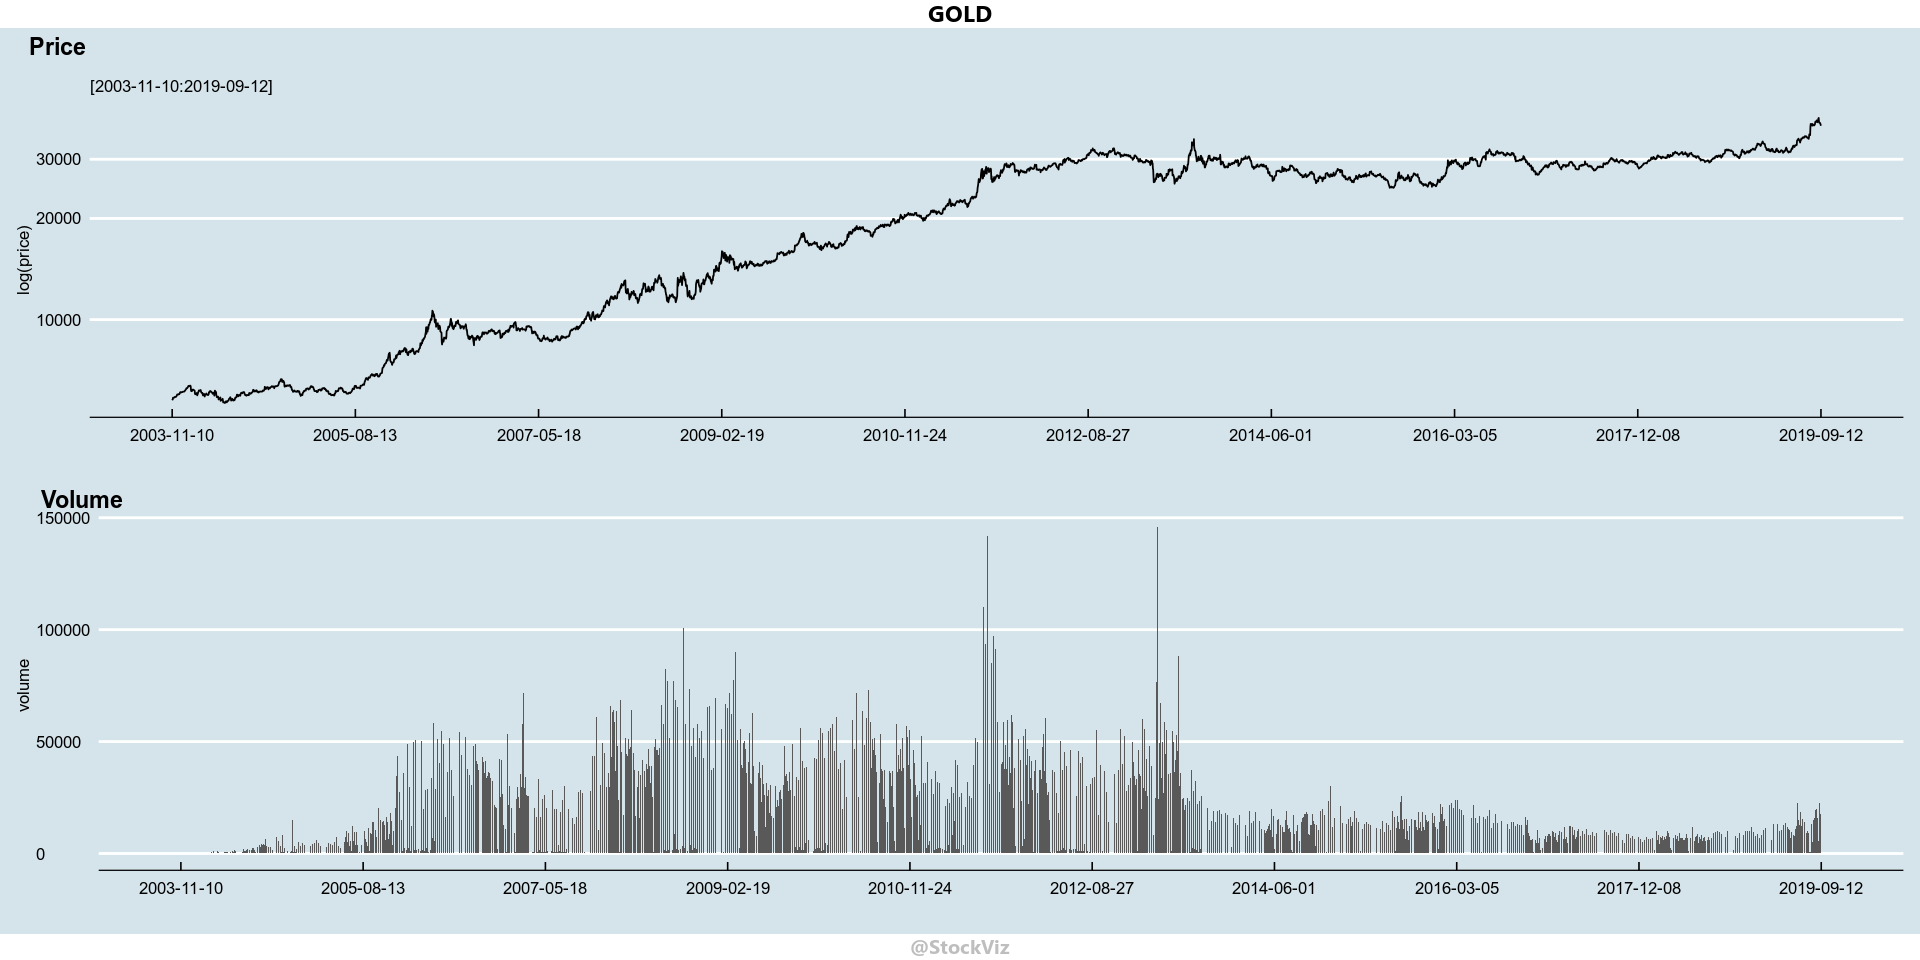

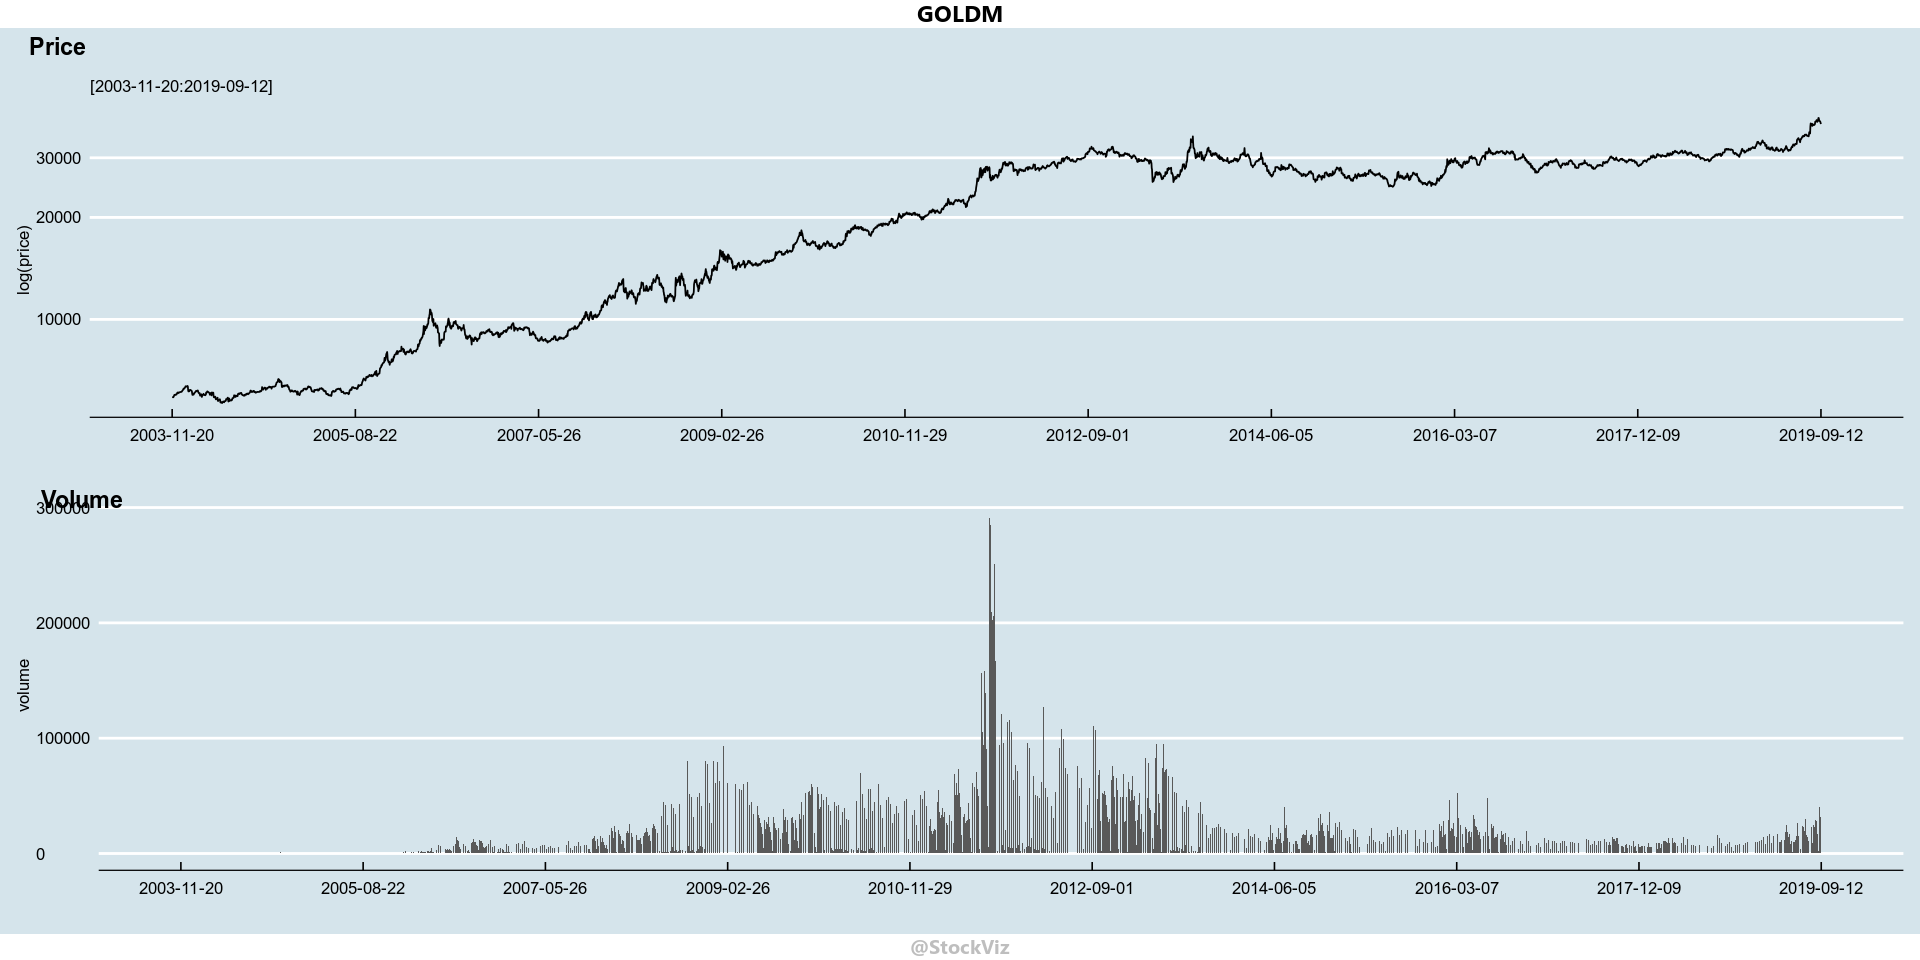

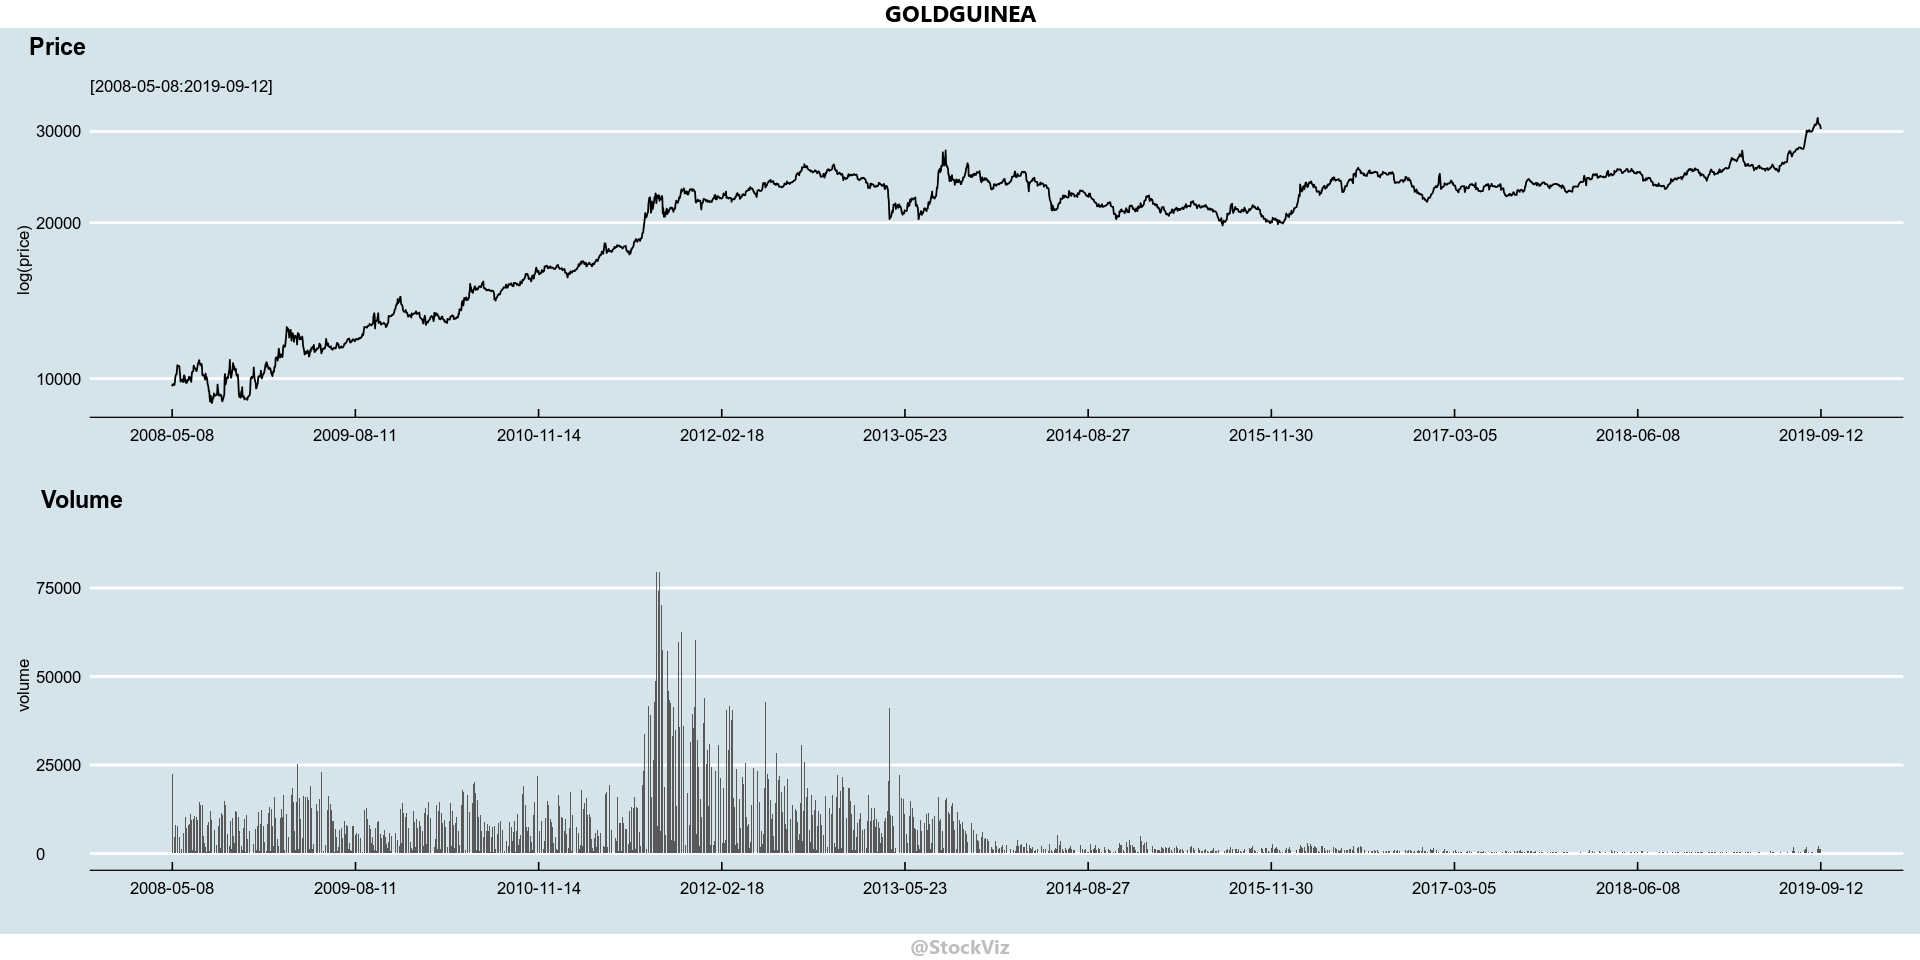

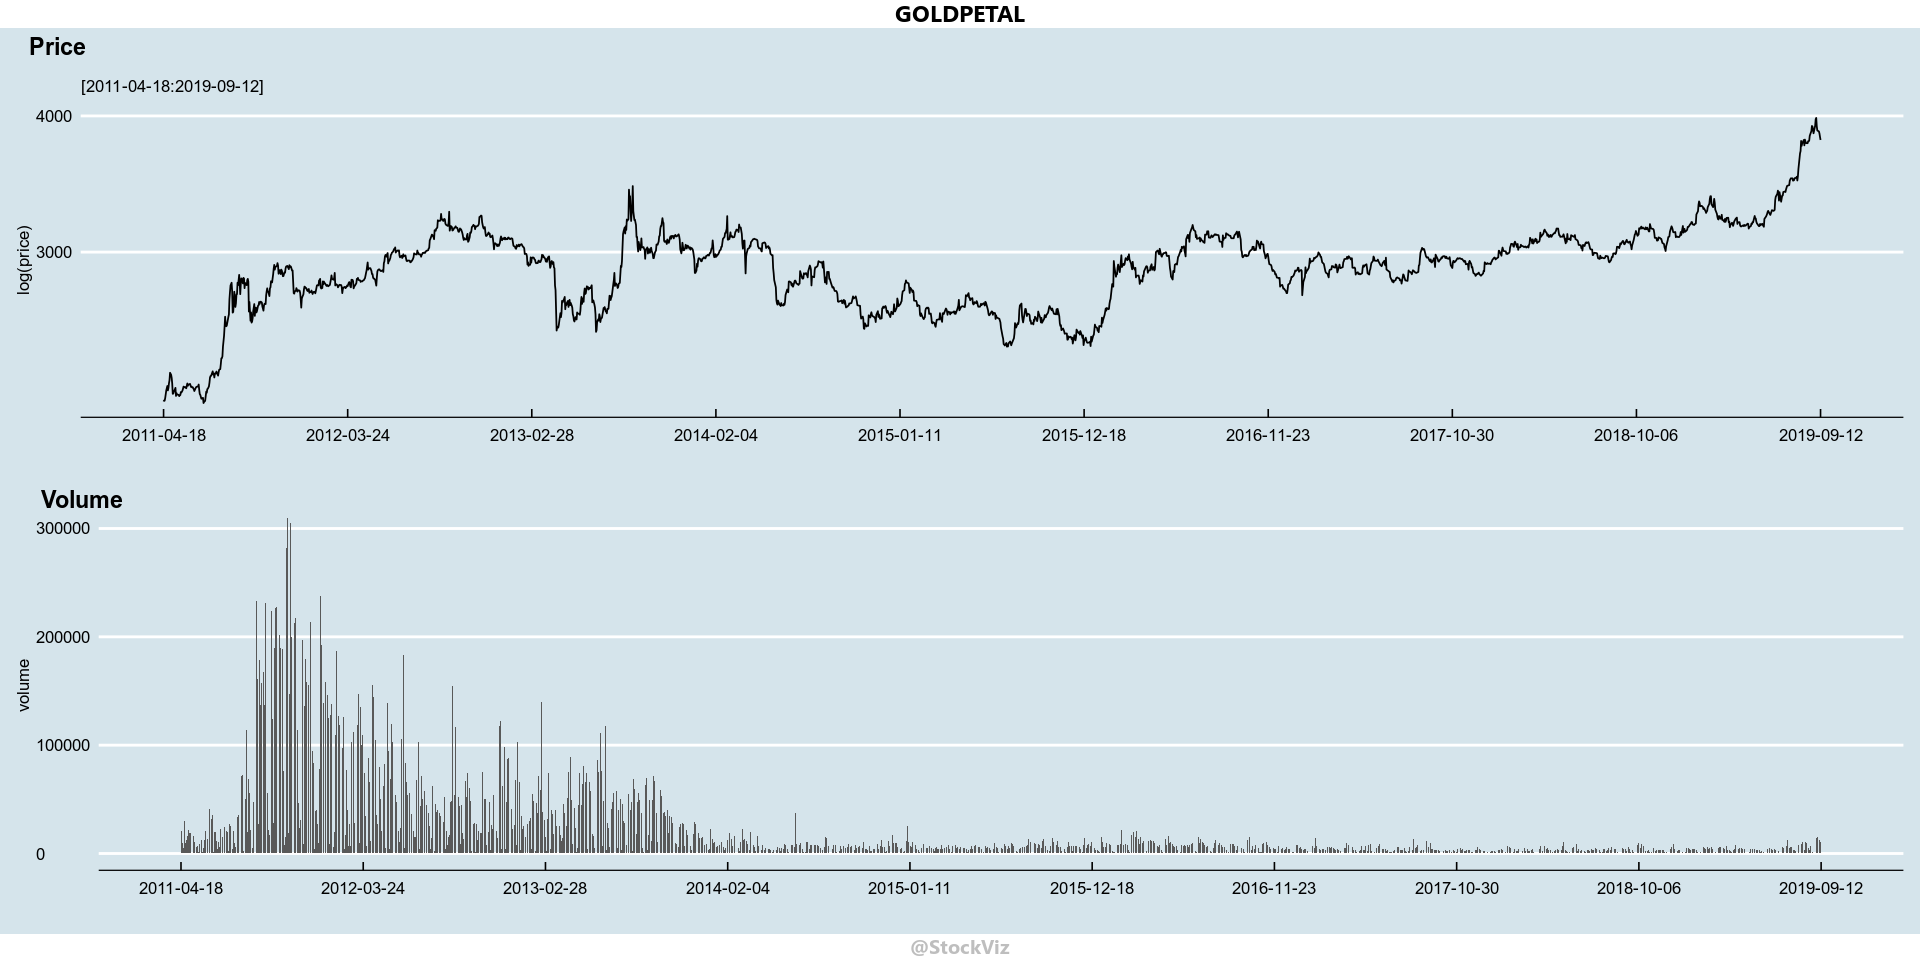

In [5]:
#plotTimeSeries('GOLD')
for(cName in contractNames) plotTimeSeries(cName)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)